In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from functionspipe import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
files = ['Data/content.csv', 'Data/genres.csv', 'Data/labels.csv', 'Data/reviews.csv', 'Data/years.csv']

In [3]:
print(df_frames(files))

[       reviewid                                            content
0         22703  “Trip-hop” eventually became a ’90s punchline,...
1         22721  Eight years, five albums, and two EPs in, the ...
2         22659  Minneapolis’ Uranium Club seem to revel in bei...
3         22661  Kleenex began with a crash. It transpired one ...
4         22725  It is impossible to consider a given release b...
5         22722  In the pilot episode of “Insecure,” the critic...
6         22704  Rapper Simbi Ajikawo, who records as Little Si...
7         22694  For the last thirty years, Israel’s electronic...
8         22714  Ambient music is a funny thing. As innocuous a...
9         22724  There were innumerable cameos at the Bad Boy F...
10        22715  Lots of drone musicians have been called sound...
11        22745  On 2006’s “That’s Life,” Killer Mike boasted “...
12        22700  “Why so sad?/Don’t feel so bad/Get out of bed,...
13        22720  In January 2016, rapper/actor Yasiin Bey ann

In [4]:
df = reduce(lambda x,y: pd.merge(x,y, on='reviewid', how='outer'), [df_frames(files)[0], df_frames(files)[1], df_frames(files)[2], df_frames(files)[3], df_frames(files)[4]])

In [5]:
df.head(10)

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year
0,22703,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,1998.0
1,22721,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,2016.0
2,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0
3,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,fashionable idiots,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0
4,22661,Kleenex began with a crash. It transpired one ...,rock,kill rock stars,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,2016.0
5,22661,Kleenex began with a crash. It transpired one ...,rock,mississippi,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,2016.0
6,22725,It is impossible to consider a given release b...,electronic,teklife,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,2016.0
7,22722,"In the pilot episode of “Insecure,” the critic...",NaN,rca,insecure (music from the hbo original series),various artists,http://pitchfork.com/reviews/albums/22722-inse...,7.4,0,vanessa okoth-obbo,contributor,2017-01-05,3,5,1,2017,2016.0
8,22704,"Rapper Simbi Ajikawo, who records as Little Si...",rap,age 101,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,5,1,2017,2016.0
9,22694,"For the last thirty years, Israel’s electronic...",electronic,stroboscopic artefacts,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,contributor,2017-01-05,3,5,1,2017,2016.0


In [6]:
df.shape

(26018, 17)

In [7]:
cols = df.columns.tolist()
cols

['reviewid',
 'content',
 'genre',
 'label',
 'title',
 'artist',
 'url',
 'score',
 'best_new_music',
 'author',
 'author_type',
 'pub_date',
 'pub_weekday',
 'pub_day',
 'pub_month',
 'pub_year',
 'year']

In [8]:
null_cols = df.isnull().sum()
null_cols[null_cols>0]

content          14
genre          2701
label            53
title             4
artist            2
author_type    5678
year            592
dtype: int64

In [9]:
drop_cols = list(null_cols[null_cols > 5000].index)
data = df.drop(drop_cols, axis=1)

In [10]:
data.head(10)

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year,year
0,22703,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,2017-01-08,6,8,1,2017,1998.0
1,22721,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,2017-01-07,5,7,1,2017,2016.0
2,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,2017-01-07,5,7,1,2017,2016.0
3,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,fashionable idiots,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,2017-01-07,5,7,1,2017,2016.0
4,22661,Kleenex began with a crash. It transpired one ...,rock,kill rock stars,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,2017-01-06,4,6,1,2017,2016.0
5,22661,Kleenex began with a crash. It transpired one ...,rock,mississippi,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,2017-01-06,4,6,1,2017,2016.0
6,22725,It is impossible to consider a given release b...,electronic,teklife,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,2017-01-06,4,6,1,2017,2016.0
7,22722,"In the pilot episode of “Insecure,” the critic...",NaN,rca,insecure (music from the hbo original series),various artists,http://pitchfork.com/reviews/albums/22722-inse...,7.4,0,vanessa okoth-obbo,2017-01-05,3,5,1,2017,2016.0
8,22704,"Rapper Simbi Ajikawo, who records as Little Si...",rap,age 101,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,2017-01-05,3,5,1,2017,2016.0
9,22694,"For the last thirty years, Israel’s electronic...",electronic,stroboscopic artefacts,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,2017-01-05,3,5,1,2017,2016.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26018 entries, 0 to 26017
Data columns (total 16 columns):
reviewid          26018 non-null int64
content           26004 non-null object
genre             23317 non-null object
label             25965 non-null object
title             26014 non-null object
artist            26016 non-null object
url               26018 non-null object
score             26018 non-null float64
best_new_music    26018 non-null int64
author            26018 non-null object
pub_date          26018 non-null object
pub_weekday       26018 non-null int64
pub_day           26018 non-null int64
pub_month         26018 non-null int64
pub_year          26018 non-null int64
year              25426 non-null float64
dtypes: float64(2), int64(6), object(8)
memory usage: 3.4+ MB


In [12]:
before = len(data.columns)
select_columns = ['content', 'label', 'url', 'best_new_music', 'author', 'pub_date', 'pub_weekday', 'pub_day', 'pub_month', 'pub_year']

dframe = data.drop(select_columns, axis=1)
after = len(dframe.columns)
print('Número de columnas finales: ', after)

Número de columnas finales:  6


In [13]:
dframe.head(20)

,reviewid,genre,title,artist,score,year
0,22703,electronic,mezzanine,massive attack,9.3,1998.0
1,22721,metal,prelapsarian,krallice,7.9,2016.0
2,22659,rock,all of them naturals,uranium club,7.3,2016.0
3,22659,rock,all of them naturals,uranium club,7.3,2016.0
4,22661,rock,first songs,"kleenex, liliput",9.0,2016.0
5,22661,rock,first songs,"kleenex, liliput",9.0,2016.0
6,22725,electronic,new start,taso,8.1,2016.0
7,22722,NaN,insecure (music from the hbo original series),various artists,7.4,2016.0
8,22704,rap,stillness in wonderland,little simz,7.1,2016.0
9,22694,electronic,tehillim,yotam avni,7.0,2016.0


In [14]:
select_columns = ['reviewid', 'genre', 'title', 'artist', 'score', 'year']
dframe = dframe[select_columns].drop_duplicates()
after = len(dframe)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  -23542


In [15]:
dframe.head(20)

,reviewid,genre,title,artist,score,year
0,22703,electronic,mezzanine,massive attack,9.3,1998.0
1,22721,metal,prelapsarian,krallice,7.9,2016.0
2,22659,rock,all of them naturals,uranium club,7.3,2016.0
4,22661,rock,first songs,"kleenex, liliput",9.0,2016.0
6,22725,electronic,new start,taso,8.1,2016.0
7,22722,NaN,insecure (music from the hbo original series),various artists,7.4,2016.0
8,22704,rap,stillness in wonderland,little simz,7.1,2016.0
9,22694,electronic,tehillim,yotam avni,7.0,2016.0
10,22714,experimental,reflection,brian eno,7.7,2017.0
11,22724,rap,filthy america its beautiful,the lox,5.3,2016.0


In [16]:
dframe = dframe.rename(columns={'title':'album'})
dframe.columns

Index(['reviewid', 'genre', 'album', 'artist', 'score', 'year'], dtype='object')

In [17]:
column_order = ['reviewid', 'artist', 'album', 'year', 'genre', 'score']
dframe = dframe[column_order]
dframe.head(10)

,reviewid,artist,album,year,genre,score
0,22703,massive attack,mezzanine,1998.0,electronic,9.3
1,22721,krallice,prelapsarian,2016.0,metal,7.9
2,22659,uranium club,all of them naturals,2016.0,rock,7.3
4,22661,"kleenex, liliput",first songs,2016.0,rock,9.0
6,22725,taso,new start,2016.0,electronic,8.1
7,22722,various artists,insecure (music from the hbo original series),2016.0,NaN,7.4
8,22704,little simz,stillness in wonderland,2016.0,rap,7.1
9,22694,yotam avni,tehillim,2016.0,electronic,7.0
10,22714,brian eno,reflection,2017.0,experimental,7.7
11,22724,the lox,filthy america its beautiful,2016.0,rap,5.3


In [18]:
dframe['year'] = dframe['year'].fillna(0)

In [19]:
print(set(dframe['year']))

{0.0, 1959.0, 1960.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0}


In [20]:
dframe['year'] = dframe['year'].astype('int64')
dframe['year'].dtype

dtype('int64')

In [21]:
print(set(dframe['year']))

{0, 1959, 1960, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017}


In [22]:
dframe[('year')].value_counts()

2007    1608
2005    1570
2008    1544
2006    1502
2010    1486
2011    1465
2009    1435
2012    1411
2013    1409
2004    1360
2003    1341
2016    1313
2014    1303
2002    1212
2015    1180
2001     720
0        524
2000     278
1999     158
1980      43
1996      41
1981      35
1977      33
1994      33
1971      33
1979      31
1992      29
1982      27
1997      25
1998      25
1985      24
1990      24
1993      23
1991      22
1970      21
1995      21
1968      20
1983      19
1988      18
1969      17
1989      17
1972      16
1987      15
1973      15
1975      14
1984      13
1974      12
1978      12
1976      12
1966       9
1986       9
1965       7
1967       7
1964       6
1963       3
1962       3
1960       3
2017       1
1959       1
Name: year, dtype: int64

In [23]:
dframe = dframe[dframe.year != 0]

In [24]:
dframe.head(10)

,reviewid,artist,album,year,genre,score
0,22703,massive attack,mezzanine,1998,electronic,9.3
1,22721,krallice,prelapsarian,2016,metal,7.9
2,22659,uranium club,all of them naturals,2016,rock,7.3
4,22661,"kleenex, liliput",first songs,2016,rock,9.0
6,22725,taso,new start,2016,electronic,8.1
7,22722,various artists,insecure (music from the hbo original series),2016,NaN,7.4
8,22704,little simz,stillness in wonderland,2016,rap,7.1
9,22694,yotam avni,tehillim,2016,electronic,7.0
10,22714,brian eno,reflection,2017,experimental,7.7
11,22724,the lox,filthy america its beautiful,2016,rap,5.3


In [25]:
dframe['genre'] = dframe['genre'].fillna(0)

In [26]:
dframe[('genre')].value_counts()

rock            9631
electronic      3875
0               2394
experimental    1880
rap             1578
pop/r&b         1437
metal            875
folk/country     700
jazz             437
global           227
Name: genre, dtype: int64

In [27]:
dframe = dframe[dframe.genre != 0]

In [28]:
dframe.head(20)

,reviewid,artist,album,year,genre,score
0,22703,massive attack,mezzanine,1998,electronic,9.3
1,22721,krallice,prelapsarian,2016,metal,7.9
2,22659,uranium club,all of them naturals,2016,rock,7.3
4,22661,"kleenex, liliput",first songs,2016,rock,9.0
6,22725,taso,new start,2016,electronic,8.1
8,22704,little simz,stillness in wonderland,2016,rap,7.1
9,22694,yotam avni,tehillim,2016,electronic,7.0
10,22714,brian eno,reflection,2017,experimental,7.7
11,22724,the lox,filthy america its beautiful,2016,rap,5.3
12,22715,harry bertoia,clear sounds/perfetta,2016,experimental,8.0


In [29]:
null_cols = dframe.isnull().sum()
null_cols[null_cols>0]

album    1
dtype: int64

In [30]:
dframe[('album')].value_counts()

dj-kicks                                        25
ii                                              18
iii                                             12
live                                             9
trouble                                          8
fourth world vol. 1: possible musics             8
split ep                                         8
cluster 71                                       8
v                                                8
cluster & eno                                    8
movie!                                           8
m83                                              8
greatest hits                                    8
the singles                                      7
dj kicks                                         7
play                                             7
give up                                          6
the culling is coming                            6
lp                                               6
 void                          

In [31]:
dframe['album'] = dframe['album'].fillna(0)

In [32]:
dframe = dframe[dframe.album != 0]

In [33]:
dframe.head(20)

,reviewid,artist,album,year,genre,score
0,22703,massive attack,mezzanine,1998,electronic,9.3
1,22721,krallice,prelapsarian,2016,metal,7.9
2,22659,uranium club,all of them naturals,2016,rock,7.3
4,22661,"kleenex, liliput",first songs,2016,rock,9.0
6,22725,taso,new start,2016,electronic,8.1
8,22704,little simz,stillness in wonderland,2016,rap,7.1
9,22694,yotam avni,tehillim,2016,electronic,7.0
10,22714,brian eno,reflection,2017,experimental,7.7
11,22724,the lox,filthy america its beautiful,2016,rap,5.3
12,22715,harry bertoia,clear sounds/perfetta,2016,experimental,8.0


In [34]:
sel_col = ['reviewid', 'artist', 'album']
df_dupl = dframe.drop_duplicates(sel_col, keep='first')

In [35]:
df_final = df_dupl.sort_values('score', ascending=False)
df_final.head(20)

,reviewid,artist,album,year,genre,score
6153,17497,nas,illmatic,1994,rap,10.0
264,22485,bob dylan,blood on the tracks,1975,rock,10.0
11758,13433,the beatles,rubber soul,1965,rock,10.0
11752,13431,the beatles,abbey road,1969,rock,10.0
11748,13432,the beatles,the beatles,1968,rock,10.0
11742,13449,the stone roses,the stone roses,2009,rock,10.0
13977,11376,otis redding,otis blue: otis redding sings soul [collector'...,1965,pop/r&b,10.0
253,22374,public image ltd,metal box,1979,rock,10.0
5004,18517,nirvana,in utero: 20th anniversary edition,1993,rock,10.0
20531,1490,the clash,london calling: 25th anniversary legacy edition,2004,rock,10.0


In [36]:
score = df_final['score']
bins = (0, 3, 5, 6, 8, 9, 10)
labels = ('Pésimo', 'Flojo', 'Para fans', 'Recomendado', 'Muy bueno', 'Obra maestra')
groups = pd.cut(score, bins=bins, labels=labels)

scores = groups.value_counts(sort=False)
scores

Pésimo            232
Flojo            1009
Para fans        1719
Recomendado     10124
Muy bueno        2223
Obra maestra      346
Name: score, dtype: int64

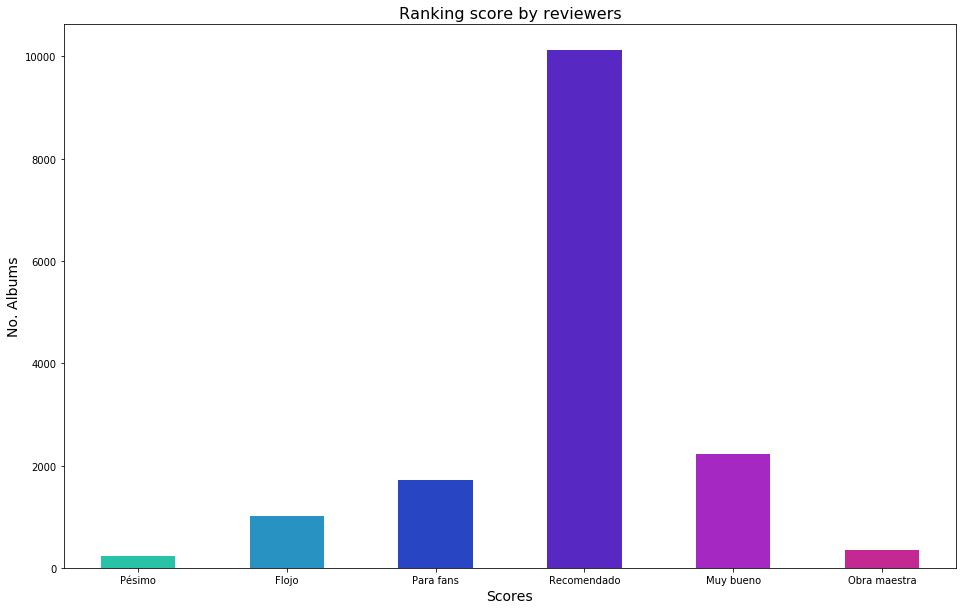

In [37]:
colors = ('#28C3A6', '#2893C3', '#2845C3', '#5828C3', '#A628C3', '#C32893')
ax = scores.plot.bar(rot=0, color=colors, figsize=(16,10))
plt.title("Ranking score by reviewers", fontsize=16)
plt.ylabel('No. Albums', fontsize=14)
plt.xlabel('Scores', fontsize=14)
plt.show()